In [52]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib tk
from mpl_toolkits.mplot3d import Axes3D
import copy, random, pathlib, os, time
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim

## 2D dataset

In [62]:
scaler = torch.tensor([0.5, 2])
def loss_func(x):
    return -(torch.sin(torch.sqrt(torch.sum(scaler*x**2, dim=-1)))*2-1.)

def loss_func(x):
    

In [63]:
num_points = 50
X1 = np.linspace(-4, 3, num_points)
# X1 = np.linspace(-2.5, 0, num_points)
X2 = np.linspace(-3, 4, num_points)
# X2 = np.linspace(-2, 2, num_points)
X1, X2 = np.meshgrid(X1, X2)

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
xx = torch.Tensor(np.c_[x1, x2])

Y = loss_func(xx).data.numpy().reshape(X1.shape)

In [64]:
####Scaling the data to range -1,1
# X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
# X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
# Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

yy = torch.Tensor(Y.reshape(-1,1))

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

Text(0.5, 0, 'Y')

In [65]:
X = torch.tensor([-1.9,-1.9], requires_grad=True)

In [66]:
%matplotlib tk
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.scatter(float(X[0]), float(X[1]), float(loss_func(X)))

In [67]:
prev_lr = 0.1
prev_xg = torch.randn(2)
prev_xg /= torch.norm(prev_xg)
prev_xg

tensor([ 0.9933, -0.1159])

In [68]:
yout = loss_func(X)
yout.backward()
# xgrad = -torch.autograd.grad(outputs=yout, inputs=X)[0]
xgrad = -X.grad.data
xgrad = xgrad/torch.norm(xgrad)
xgrad

tensor([0.2425, 0.9701])

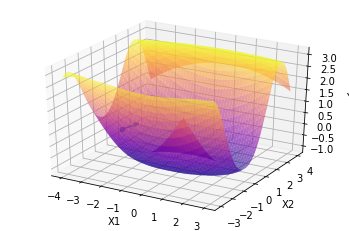

In [69]:
%matplotlib inline
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

## current grad
ax.scatter(float(X[0]), float(X[1]), float(loss_func(X)))
ax.quiver3D(float(X[0]), float(X[1]), float(loss_func(X)),
           float(xgrad[0]), float(xgrad[1]), 0)

In [70]:
multiplier = 2**float(xgrad@prev_xg)
multiplier

1.0930935084753957

In [71]:
cur_lr = prev_lr*multiplier
cur_lr

0.10930935084753957

In [72]:
X.data += cur_lr*xgrad
X

tensor([-1.8735, -1.7940], requires_grad=True)

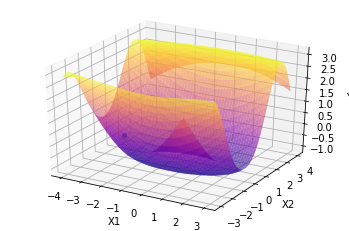

In [73]:
%matplotlib inline
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

## current grad
ax.scatter(float(X[0]), float(X[1]), float(loss_func(X)))
# ax.quiver3D(float(X[0]), float(X[1]), float(loss_func(X)),
#            float(xgrad[0]), float(xgrad[1]), 0)

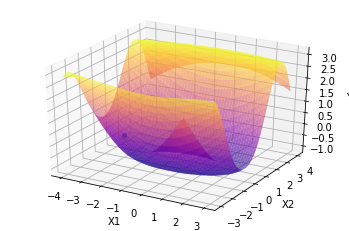

In [74]:
%matplotlib inline
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

## current grad
ax.scatter(float(X[0]), float(X[1]), float(loss_func(X)))
# ax.quiver3D(float(X[0]), float(X[1]), float(loss_func(X)),
#            float(xgrad[0]), float(xgrad[1]), 0)

## In a loop

In [81]:
# X = torch.tensor([-1.9,-2.], requires_grad=True)
# X = torch.tensor([-0.1,-0.], requires_grad=True)
X = torch.rand(2)
X[0] = X[0]*5-3 
X[1] = X[1]*5-2 
X = nn.Parameter(X)

In [82]:
prev_lr = 0.2
prev_xg = torch.randn(2)
prev_xg /= torch.norm(prev_xg)

In [83]:
%matplotlib tk

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

for epoch in range(100):
    yout = loss_func(X)
    yout.backward()
    print(f"X={X.data.numpy()}, y={yout.data.numpy()}")
#     xgrad = -torch.autograd.grad(outputs=yout, inputs=X)[0]
    xgrad = -X.grad.data
    xgrad = xgrad/torch.norm(xgrad)
    X.grad *= 0.
    multiplier = 2**float(xgrad@prev_xg)
    multiplier = (multiplier-0.25)/1.1666666
    prev_xg = xgrad
    
    cur_lr = prev_lr*multiplier
    prev_lr = cur_lr
    xgrad = cur_lr*xgrad
    print(f"LR: {cur_lr}; Multiplier: {multiplier:.3f}")
    print(f"Grad: {xgrad.data.numpy()}")
    
####################################################
    ax.clear()
    ax.plot_surface(X1, X2, Y, cmap='plasma', alpha=0.6)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')

    ax.scatter(float(X[0]), float(X[1]), float(loss_func(X)))
    ax.quiver3D(float(X[0]), float(X[1]), float(loss_func(X)),
               float(xgrad[0]), float(xgrad[1]), 0)
    
####################################################
    ax2.clear()
    ax2.contourf(X1, X2, Y, levels=15)
    ax2.scatter(float(X[0]), float(X[1]))
    ax2.arrow(float(X[0]), float(X[1]), 
              float(xgrad[0]), float(xgrad[1]),
              lw=1, fill=False, head_length=.05, head_width=.02,length_includes_head=True)
    
    
    X.data += xgrad
    
    fig.canvas.draw()
    plt.pause(1)
    print()

X=[-1.6346638 -0.7349993], y=-0.9997348785400391
LR: 0.19163162642207593; Multiplier: 0.958
Grad: [-0.09312253 -0.16748396]

X=[-1.7277863 -0.9024832], y=-0.9617061614990234
LR: 0.041170031779899474; Multiplier: 0.215
Grad: [0.01777389 0.0371357 ]

X=[-1.7100124 -0.8653475], y=-0.9776649475097656
LR: 0.06175125773771345; Multiplier: 1.500
Grad: [0.02735104 0.05536369]

X=[-1.6826614 -0.8099838], y=-0.9934723377227783
LR: 0.09261199661886402; Multiplier: 1.500
Grad: [0.04268476 0.08218877]

X=[-1.6399766 -0.727795 ], y=-0.999589204788208
LR: 0.019861346620322316; Multiplier: 0.214
Grad: [-0.00974825 -0.01730447]

X=[-1.6497248 -0.7450995], y=-0.9999985694885254
LR: 0.00425616837774425; Multiplier: 0.214
Grad: [0.0020612  0.00372377]

X=[-1.6476636  -0.74137574], y=-0.999988317489624
LR: 0.0009120377156467047; Multiplier: 0.214
Grad: [-0.00044296 -0.00079725]

X=[-1.6481066 -0.742173 ], y=-0.999994158744812
LR: 0.001368056587049324; Multiplier: 1.500
Grad: [-0.00066403 -0.0011961 ]

X=[-

TclError: can't invoke "update" command: application has been destroyed

In [59]:
print(yy.min())

tensor(-1.)
